## Implementing of the K-Nearest Neighbors Regressor 

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from PIL import Image

In [2]:
dataset=make_regression(n_samples=1000,n_features=4)

In [3]:
X=dataset[0]
y=dataset[1]

In [4]:
sc= StandardScaler()
X=sc.fit_transform(X)

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [6]:
X.shape

(1000, 4)

Text(0.5, 1.0, 'All Data')

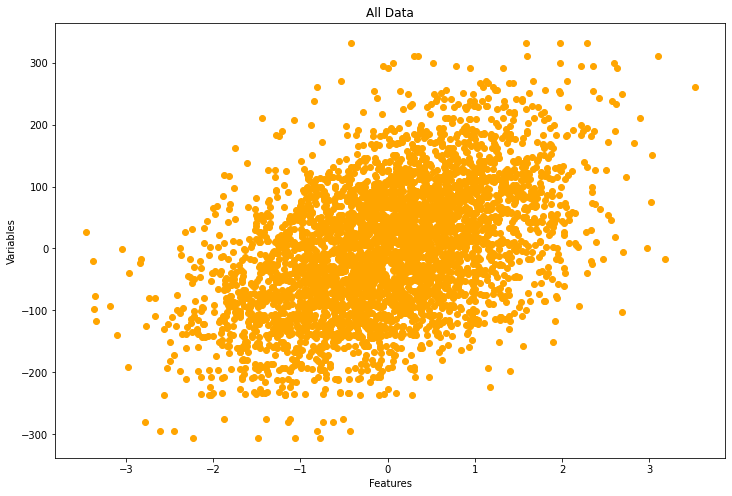

In [7]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0],y,c='orange')
plt.scatter(X[:,1],y,c='orange')
plt.scatter(X[:,2],y,c='orange')
plt.scatter(X[:,3],y,c='orange')
plt.xlabel('Features')
plt.ylabel('Variables')
plt.title('All Data')

#### Description of the K-Nearest Neighbors Regressor

* **#1** Find the distance between each test data and the training data with **metric_distance()** method.
* **#2** Sort the distances with y_train in **predict()** method
* **#3** Limit the distances ordered from lowest to highest by the number of neighbors n and calculate **mean** of them in **predict()**



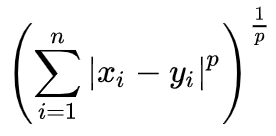

In [8]:
Image.open('Figures/minkowski.png')

Calculation of the distance formula, when **p=2** equals to minkowski distance 

In [25]:
class KNeighborsRegressor_mine():
    
    """
    
    Regression based on k-nearest neighbors.

    The target is predicted by local interpolation of the targets associated of the nearest neighbors in the training set.

    Hyperparameters::
    
       n_neighbors : int, default=5 
       
       metric : str or callable, default=’minkowski’
       
       p : int, default=2
       Power parameter for the Minkowski metric. 
       When p = 1, this is equivalent to using manhattan_distance (l1), 
       and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.
       
    Attributes::
    
        neighbors : numpy array
 
        To view classified continuous data.
        

    """
    
    def __init__(self,n_neighbors=5,metric='minkowski',p=2):
        
        self.n_neighbors=n_neighbors
        self.metric=metric 
        self.p=p
        self.neighbors=None
        
    def metric_distance(self,x_test,X_train):
    
        return np.power(np.sum(abs(x_test - X_train)**self.p, axis=1,dtype=float),1./self.p) 
    
    
    def predict(self,X_test):
        
        results=np.zeros(X_test.shape[0])
        neighbors_all=[]
        for idx,x_test in enumerate(X_test):
        
            neighbors=[]
            distances =self.metric_distance(x_test,self.X_train)
            sorted_=np.array([x_train for dist,x_train in sorted(zip(distances,self.y_train))])
            neighbors=sorted_[:self.n_neighbors]
            neighbors_all.append(neighbors)
            results[idx]=neighbors.mean()
            
        self.neighbors=np.array(neighbors_all)
            
        return results
    
    def fit(self,X_train,y_train):
        
        self.X_train=X_train
        self.y_train=y_train
        
    
 

### Determination of the Neighbors Number

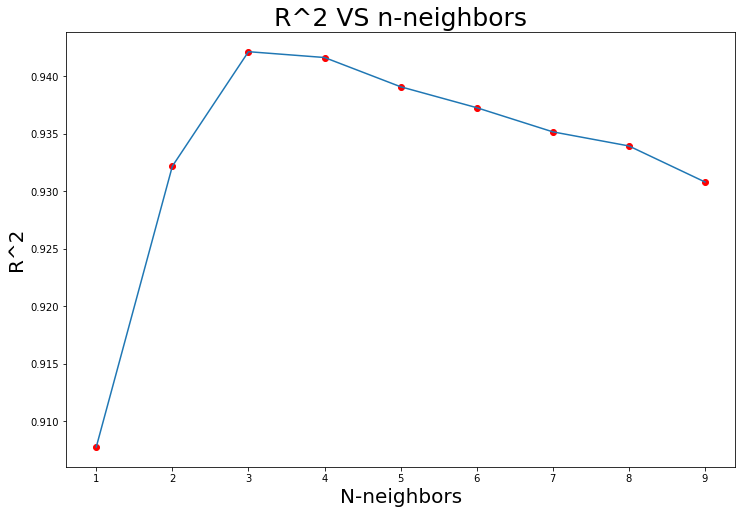

n-neighbors should be : 3


In [59]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsRegressor

cross_validation_error=np.zeros(10)
for n in range(1,10):
        
    model=KNeighborsRegressor(n_neighbors=n)
    model.fit(X_train,y_train)
    
    y_train_pred=model.predict(X_train)
    cve=cross_validate(model,X_train,y_train,scoring='r2',cv=6,return_train_score=True)

    cross_validation_error[n]=np.mean(np.absolute(cve['test_score']))
     
cross_validation_error=np.delete(cross_validation_error,0)      
fig,ax=plt.subplots(figsize=(12,8))
ax.plot(range(1,10),cross_validation_error)
ax.scatter(range(1,10),cross_validation_error,color='red')
ax.set_xlabel('N-neighbors',fontsize=20)
ax.set_ylabel('R^2',fontsize=20)
ax.set_title('R^2 VS n-neighbors',fontsize=25)
plt.show()
print('n-neighbors should be :',cross_validation_error.argmax()+1)

In [60]:
cross_validation_error

array([0.9077601 , 0.9321818 , 0.94214158, 0.94163484, 0.93909163,
       0.93727164, 0.9351699 , 0.93394404, 0.9308094 ])

### Comparing Results

In [28]:
from sklearn.metrics import r2_score

#### Hand-made Results

In [29]:
model_mine=KNeighborsRegressor_mine(n_neighbors=3)

In [30]:
%time model_mine.fit(X_train,y_train)

CPU times: user 13 µs, sys: 2 µs, total: 15 µs
Wall time: 21 µs


In [31]:
yhat_mine=model_mine.predict(X_test)

In [32]:
r2_score(y_test,yhat_mine)

0.9428750999929253

In [33]:
mean_squared_error(y_test,yhat_mine)

692.7789801987153

#### Sklearn.KNeighborsRegressor Results

In [52]:
model=KNeighborsRegressor(n_neighbors=3)

In [53]:
%time model.fit(X_train,y_train)

CPU times: user 1.37 ms, sys: 132 µs, total: 1.5 ms
Wall time: 1.43 ms


KNeighborsRegressor(n_neighbors=3)

In [54]:
yhat_sklearn=model.predict(X_test)

In [55]:
r2_score(y_test,yhat_sklearn)

0.9428750999929253

In [56]:
mean_squared_error(y_test,yhat_sklearn)

692.7789801987153

#### Plots 

In [297]:
yhat_mine[:3]

array([ 139.51161551,   56.00454022, -208.12949351])

In [298]:
model_mine.neighbors[0:3].mean(axis=1)

array([ 139.51161551,   56.00454022, -208.12949351])

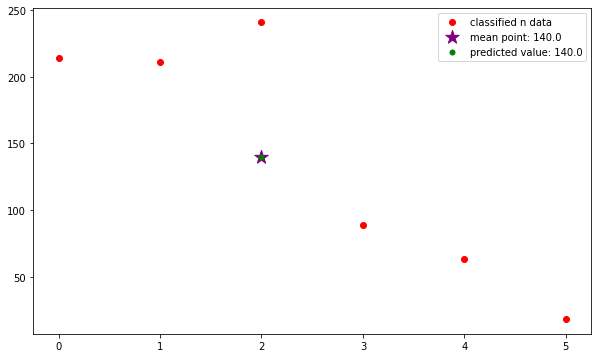

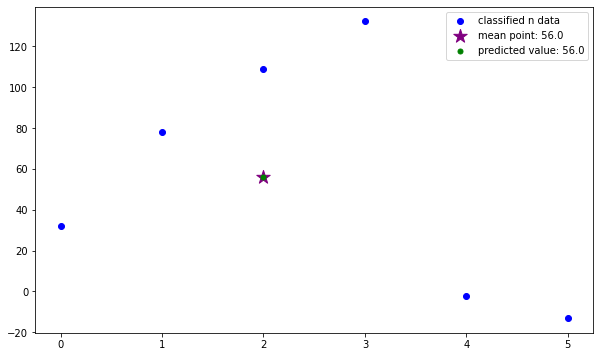

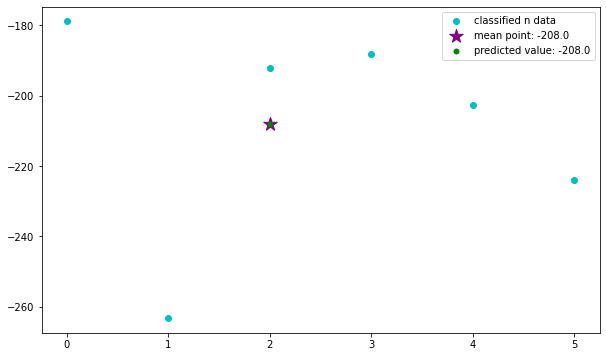

In [299]:
colors=['r','b','c']
for k in range(3):
    fig=plt.figure(figsize=(10,6)) 
    plt.scatter(np.arange(model_mine.n_neighbors),model_mine.neighbors[k],label='classified n data',c=colors[k])
    plt.scatter(2,model_mine.neighbors[k].mean(),s=200,label='mean point: {}'.format(model_mine.neighbors[k].mean().round(),),marker='*',c='purple')
    plt.scatter(2,yhat_mine[k],s=100,label='predicted value: {}'.format(yhat_mine[k].round()),marker='.',c='green')
    plt.legend()